In [1]:
# Import the necessary libraries:

import pandas as pd
import numpy as np


In [2]:
# Load the dataset:
df = pd.read_csv(r'C:\Users\vik\Desktop\project_2\Telco-Customer-Churn\customer_data.csv')  # Replace 'your_dataset.csv' with the path or filename of your dataset
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# pd.set_option('display.max.columns', 21)
# df

In [4]:
# Data Cleaning: Remove irrelevant columns

df = df.drop(['customerID', 'SeniorCitizen'], axis=1)  # Replace 'column1' and 'column2' with the names of the columns to be removed
# pd.set_option('display.max.rows', 7043)
# df

In [5]:
# Handling missing values:
# df = df.dropna()  # Remove rows with any missing values

In [6]:
# Handling duplicate rows:
# df = df.drop_duplicates()  # Remove duplicate rows


In [7]:
df["MultipleLines"] = df["MultipleLines"].str.replace('No phone service','')
df["OnlineSecurity"] = df["OnlineSecurity"].str.replace('No internet service','')
df["InternetService"] = df["InternetService"].str.replace('No','')


In [8]:
df

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,45,No,,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,Yes,Yes,11,No,,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
for x in df.index:
    if df.loc[x, "OnlineSecurity"] == '':
        df.drop(x, inplace=True)
        

In [10]:
for x in df.index:
    if df.loc[x, "InternetService"] == '':
        df.drop(x, inplace=True)

In [11]:
for x in df.index:
    if df.loc[x, "MultipleLines"] == '':
        df.drop(x, inplace=True)

In [12]:
df

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,Male,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7038,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
# Data Transformation: Data type conversion

print(df.dtypes)


gender               object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [14]:
# 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
# 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', and 'PaymentMethod', 
# may need to be converted to a categorical data type if they are not already encoded as such. You can convert them using the 
# astype() method and 'tenure', 'MonthlyCharges', and 'TotalCharges' to numeric variables(float).

convert_to_category = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

convert_to_float = ['tenure', 'MonthlyCharges']

In [15]:
df[convert_to_category] = df[convert_to_category].astype('category')


In [16]:
df[convert_to_float] = df[convert_to_float].astype(float)

In [17]:
print(df['Churn'].unique())
df['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)


['No' 'Yes']


In [18]:
df['Churn'] = df['Churn'].astype(int)  # or df['Churn'] = df['Churn'].astype(float)


In [19]:
print(df.dtypes)

gender              category
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges          object
Churn                  int32
dtype: object


In [20]:
import numpy as np
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [21]:
print(df.dtypes)

gender              category
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                  int32
dtype: object


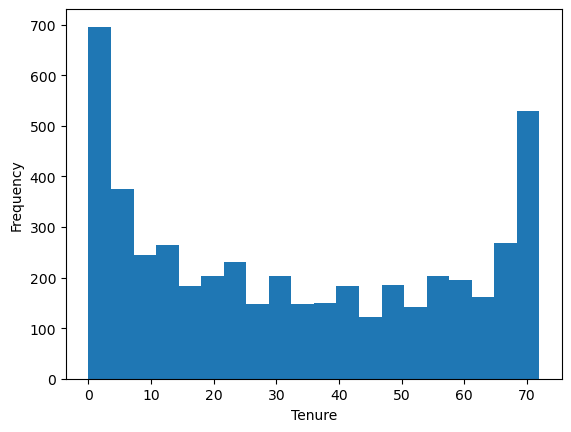

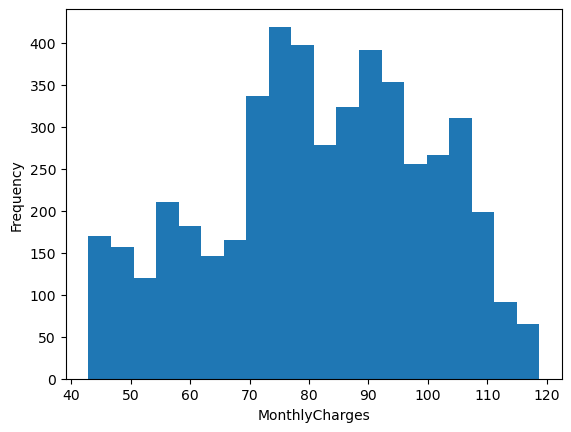

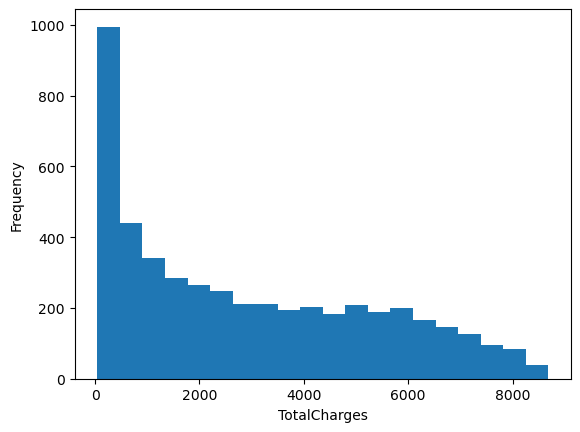

In [22]:
import matplotlib.pyplot as plt

plt.hist(df['tenure'], bins=20)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['MonthlyCharges'], bins=20)
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['TotalCharges'], bins=20)
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()


In [23]:
# Applying feature scaling:using the MinMaxScaler class from the sklearn.preprocessing module scales the values to a 
# fixed range, typically between 0 and 1.

In [24]:
#  Cross check for missing values
print(df.isnull().sum())

gender              0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64


In [25]:
# Fill missing values with a specific value with the mean of the column. 

mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [26]:
# Cross check for missing values
print(df.isnull().sum())

gender              0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [27]:
##To proceed with making predictions, you need to follow these steps:

# Separate the features (X) and the target variable (y) from the DataFrame

In [28]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [29]:
# Convert the categorical variables into numerical representations by using one-hot encoding. use the get_dummies() function 
#from pandas to perform one-hot encoding

In [30]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [31]:
# Split the data into training and testing sets using train_test_split()

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [33]:
# Scale the numeric features. Since we have numeric features in different scales, it is often beneficial to scale them to a similar range. 
# using the MinMaxScaler for this purpose

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Train and evaluate your machine learning model. For this classification task, using logistic regression

In [36]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7631851085832472


In [37]:
# Evaluating the performance of the model using appropriate metrics for classification tasks(accuracy, precision, recall, or F1 score.)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7631851085832472
Precision: 0.656957928802589
Recall: 0.6226993865030674
F1 Score: 0.6393700787401574


In [39]:
# The results you obtained from evaluating this logistic regression model are as follows:

# Accuracy: 0.7631851085832472
# Accuracy measures the overall correctness of the model's predictions. It represents the proportion of correctly predicted instances (both true positives and true negatives) out of the total number of instances. In this case, the accuracy of 0.76 indicates that the model is able to classify approximately 76% of the instances correctly.

# Precision: 0.656957928802589
# Precision is a measure of how many of the instances predicted as positive (churned in this case) are actually positive. It is the ratio of true positives to the sum of true positives and false positives. A precision value of 0.65 means that approximately 65% of the instances predicted as churned are true positives, while the remaining 35% are false positives.

# Recall: 0.6226993865030674
# Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive instances (churned) that are correctly predicted by the model. It is the ratio of true positives to the sum of true positives and false negatives. A recall value of 0.62 indicates that the model is able to capture approximately 62% of the actual positive instances.

# F1 Score: 0.6393700787401574
# The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. The F1 score ranges between 0 and 1, where a value of 1 represents perfect precision and recall, and a value of 0 represents the worst performance. In this case, the F1 score of 0.64 suggests a moderate balance between precision and recall.

In [40]:
# Analyzing additional evaluation metrics to gain deeper insights into the performance of the model.

In [41]:
# Confusion Matrix:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Extract the true positive, true negative, false positive, and false negative counts
tn, fp, fn, tp = cm.ravel()

# Calculate specificity, false positive rate, and false negative rate
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("Specificity:", specificity)
print("False Positive Rate:", fpr)
print("False Negative Rate:", fnr)

Confusion Matrix:
[[535 106]
 [123 203]]
Specificity: 0.8346333853354134
False Positive Rate: 0.16536661466458658
False Negative Rate: 0.3773006134969325


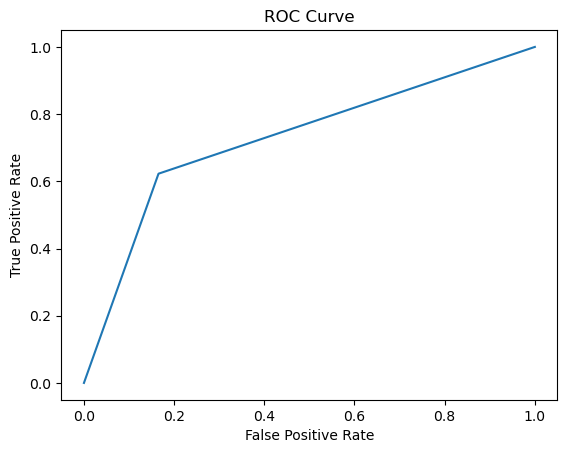

AUC: 0.7286663859192405


In [42]:
# ROC Curve and AUC:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the true positive rate and false positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

In [48]:
# Class Imbalance:

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, f1_score

# Analyze class distribution
class_counts = y_train.value_counts()
print("Class Distribution:")
print(class_counts)

# Apply oversampling or undersampling
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Calculate precision, recall, and F1 score
y_pred_resampled = model.predict(X_test_scaled)
precision = precision_score(y_test, y_pred_resampled)
recall = recall_score(y_test, y_pred_resampled)
f1 = f1_score(y_test, y_pred_resampled)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Note: run:  pip install imbalanced-learn

Class Distribution:
0    2608
1    1260
Name: Churn, dtype: int64
Precision: 0.4732142857142857
Recall: 0.8128834355828221
F1 Score: 0.5981941309255079


C:\Users\vik\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
# Cross-Validation:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:")
print(cv_scores)
print("Average Accuracy:", cv_scores.mean())


Cross-Validation Scores:
[0.7622739  0.75581395 0.75968992 0.7774903  0.76326003]
Average Accuracy: 0.7637056202386086


In [45]:
# Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10]}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 10}


In [46]:
# Training and evaluating a Random Forest model for your classification task:

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('Churn', axis=1), df_encoded['Churn'], test_size=0.2, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7456049638055843
Precision: 0.66
Recall: 0.5061349693251533
F1 Score: 0.5729166666666666
